### Basic usage

In [1]:
# this is a development environment hack!
# after pip install of sea_ingest, you'd just import sea_ingest
import __init__ as sea_ingest
from pathlib import Path
import numpy as np

data_path = Path('data')

# these return dictionaries of pandas dataframes (the default)
dfs1 = sea_ingest.read_seamf(data_path/'example_v1.sigmf')
dfs2 = sea_ingest.read_seamf(data_path/'example_v2.sigmf')
dfs3 = sea_ingest.read_seamf(data_path/'example_v3.sigmf')

# some alternative loading options
arrs3 = sea_ingest.read_seamf(data_path/'example_v3.sigmf', container_cls=np.ndarray)
data3, meta3 = sea_ingest.read_seamf(data_path/'example_v3.sigmf', force_loader_cls=bytes)

### Performance

In [2]:
for version in (1,2,3):
    print(f'======= file version {version} =========')
    print('Metadata only:')
    %timeit -n100 -r6 sea_ingest.read_seamf_meta(data_path/f'example_v{version}.sigmf')

    print('File read raw bytes:')
    %timeit -n10 -r10 sea_ingest.read_seamf(data_path/f'example_v{version}.sigmf', force_loader_cls=None)

    print('File read + metadata scan + unpack numpy.ndarray:')
    %timeit -n10 -r10 sea_ingest.read_seamf(data_path/f'example_v{version}.sigmf', container_cls=np.ndarray)

    print('File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:')
    %timeit -n10 -r10 sea_ingest.read_seamf(data_path/f'example_v{version}.sigmf')
    print('\n')


======= file version 1 =========
Metadata only:
941 µs ± 36.4 µs per loop (mean ± std. dev. of 6 runs, 100 loops each)
File read raw bytes:
5.34 ms ± 65.1 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
File read + metadata scan + unpack numpy.ndarray:
6.22 ms ± 36.4 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:
8.87 ms ± 67.7 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


======= file version 2 =========
Metadata only:
597 µs ± 4.53 µs per loop (mean ± std. dev. of 6 runs, 100 loops each)
File read raw bytes:
5.26 ms ± 61.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
File read + metadata scan + unpack numpy.ndarray:
6 ms ± 88.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:
8.25 ms ± 52.1 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


======= file version 3 =========
Metadata only:
534 µs 

### Returned data structure

In [3]:
# channel metadata
dfs3['channel_metadata']

,,overload,cal_noise_figure_dB,cal_gain_dB,iq_capture_duration_msec,sigan_attenuation_dB,sigan_preamp_enable,sigan_reference_level_dBm
datetime,frequency,,,,,,,
2023-02-14 13:11:36.015,3.555000e+09,False,4.46,30.45,4000,0,True,-25
2023-02-14 13:11:42.928,3.565000e+09,False,4.127,30.925,4000,0,True,-25
2023-02-14 13:11:47.519,3.575000e+09,False,4.151,30.794,4000,0,True,-25
2023-02-14 13:11:52.470,3.585000e+09,False,3.987,30.96,4000,0,True,-25
2023-02-14 13:11:57.647,3.595000e+09,False,4.0,31.075,4000,0,True,-25
2023-02-14 13:12:02.224,3.605000e+09,False,3.983,31.114,4000,0,True,-25
2023-02-14 13:12:07.993,3.615000e+09,False,4.069,31.003,4000,0,True,-25
2023-02-14 13:12:12.557,3.625000e+09,False,4.128,30.738,4000,0,True,-25
2023-02-14 13:12:17.139,3.635000e+09,False,3.936,31.054,4000,0,True,-25


In [4]:
# power spectral density has a "capture_statistic" index
dfs2['psd'].head(6).iloc[:,:6]

Baseband Frequency (Hz)                                  -5000000.0  \
datetime                 frequency    capture_statistic               
2023-01-23T16:35:00.106Z 3.555000e+09 max                  -161.500   
                                      mean                 -172.125   
2023-01-23T16:35:04.254Z 3.565000e+09 max                  -132.250   
                                      mean                 -149.875   
2023-01-23T16:35:08.444Z 3.575000e+09 max                  -158.500   
                                      mean                 -172.125   

Baseband Frequency (Hz)                                  -4984000.0  \
datetime                 frequency    capture_statistic               
2023-01-23T16:35:00.106Z 3.555000e+09 max                  -159.625   
                                      mean                 -170.875   
2023-01-23T16:35:04.254Z 3.565000e+09 max                  -131.000   
                                      mean                 -148.500   
2023-01-23T16:35:08.444Z 3.575000e+09 max                  -157.000   
                                      mean                 -170.875   

Baseband Frequency (Hz)                                  -4968000.0  \
datetime                 frequency    capture_statistic               
2023-01-23T16:35:00.106Z 3.555000e+09 max                  -159.750   
                                      mean                 -170.375   
2023-01-23T16:35:04.254Z 3.565000e+09 max                  -130.875   
                                      mean                 -148.000   
2023-01-23T16:35:08.444Z 3.575000e+09 max                  -155.250   
                                      mean                 -170.375   

Baseband Frequency (Hz)                                  -4952000.0  \
datetime                 frequency    capture_statistic               
2023-01-23T16:35:00.106Z 3.555000e+09 max                  -159.250   
                                      mean                 -170.375   
2023-01-23T16:35:04.254Z 3.565000e+09 max                  -130.625   
                                      mean                 -147.875   
2023-01-23T16:35:08.444Z 3.575000e+09 max                  -154.500   
                                      mean                 -170.375   

Baseband Frequency (Hz)                                  -4936000.0  \
datetime                 frequency    capture_statistic               
2023-01-23T16:35:00.106Z 3.555000e+09 max                  -159.500   
                                      mean                 -170.375   
2023-01-23T16:35:04.254Z 3.565000e+09 max                  -130.500   
                                      mean                 -147.875   
2023-01-23T16:35:08.444Z 3.575000e+09 max                  -155.500   
                                      mean                 -170.375   

Baseband Frequency (Hz)                                  -4920000.0  
datetime                 frequency    capture_statistic              
2023-01-23T16:35:00.106Z 3.555000e+09 max                  -159.250  
                                      mean                 -170.375  
2023-01-23T16:35:04.254Z 3.565000e+09 max                  -130.750  
                                      mean                 -147.875  
2023-01-23T16:35:08.444Z 3.575000e+09 max                  -157.875  
                                      mean                 -170.375

<AxesSubplot: xlabel='Baseband Frequency (Hz)', ylabel='PSD (dBm/Hz)'>

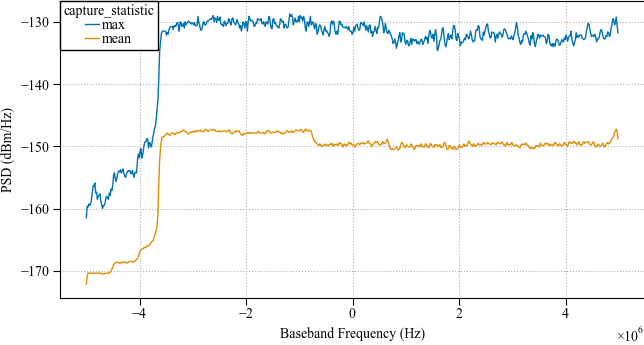

In [5]:
from matplotlib import pyplot as plt
plt.style.use('report.mplstyle')

(
    dfs2['psd']
    .droplevel('datetime')
    .loc(axis=0)[3.555e9]
    .T
    .plot(ylabel='PSD (dBm/Hz)')
)

In [6]:
dfs2['pfp'].head(12).iloc[:,:6]

Frame time elapsed (s)                                            0.000000  \
datetime                 frequency    capture_statistic detector             
2023-01-23T16:35:00.106Z 3.555000e+09 min               rms       -88.1250   
                                      max               rms       -79.6250   
                                      mean              rms       -84.5000   
                                      min               peak      -77.3750   
                                      max               peak      -65.2500   
                                      mean              peak      -72.1875   
2023-01-23T16:35:04.254Z 3.565000e+09 min               rms       -89.2500   
                                      max               rms       -79.0000   
                                      mean              rms       -84.8750   
                                      min               peak      -78.2500   
                                      max               peak      -65.7500   
                                      mean              peak      -73.6875   

Frame time elapsed (s)                                            0.000018  \
datetime                 frequency    capture_statistic detector             
2023-01-23T16:35:00.106Z 3.555000e+09 min               rms       -88.9375   
                                      max               rms       -81.4375   
                                      mean              rms       -85.8125   
                                      min               peak      -77.5000   
                                      max               peak      -65.6875   
                                      mean              peak      -72.2500   
2023-01-23T16:35:04.254Z 3.565000e+09 min               rms       -87.3125   
                                      max               rms       -78.5000   
                                      mean              rms       -82.5000   
                                      min               peak      -75.6875   
                                      max               peak      -62.0000   
                                      mean              peak      -67.3125   

Frame time elapsed (s)                                            0.000036  \
datetime                 frequency    capture_statistic detector             
2023-01-23T16:35:00.106Z 3.555000e+09 min               rms      -89.31250   
                                      max               rms      -86.37500   
                                      mean              rms      -87.75000   
                                      min               peak     -78.25000   
                                      max               peak     -66.93750   
                                      mean              peak     -72.62500   
2023-01-23T16:35:04.254Z 3.565000e+09 min               rms      -85.68750   
                                      max               rms      -78.00000   
                                      mean              rms      -81.50000   
                                      min               peak     -73.93750   
                                      max               peak     -61.59375   
                                      mean              peak     -65.68750   

Frame time elapsed (s)                                            0.000054  \
datetime                 frequency    capture_statistic detector             
2023-01-23T16:35:00.106Z 3.555000e+09 min               rms      -89.62500   
                                      max               rms      -86.62500   
                                      mean              rms      -88.31250   
                                      min               peak     -77.75000   
                                      max               peak     -67.25000   
                                      mean              peak     -72.68750   
2023-01-23T16:35:04.254Z 3.565000e+09 min               rms      -86.12500   
                   

<AxesSubplot: xlabel='Frame time elapsed (s)', ylabel='PSD (dBm/Hz)'>

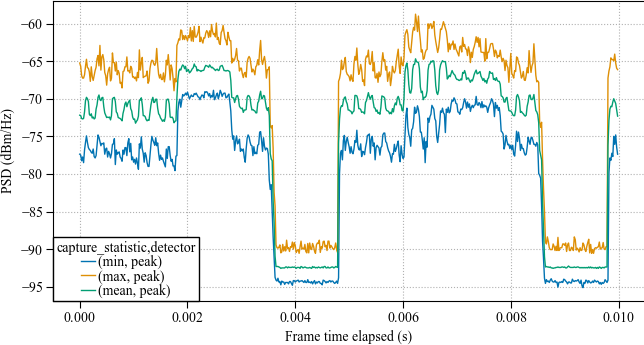

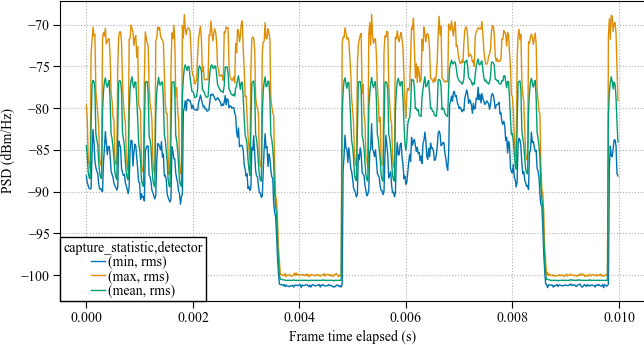

In [7]:
fig, ax = plt.subplots()
(
    dfs2['pfp']
    .loc(axis=0)[:,3.555e9,:,'peak']
    .droplevel(['datetime','frequency'])
    .T
    .plot(ax=ax, ylabel='PSD (dBm/Hz)')
)

fig, ax = plt.subplots()
(
    dfs2['pfp']
    .loc(axis=0)[:,3.555e9,:,'rms']
    .droplevel(['datetime','frequency'])
    .T
    .plot(ax=ax, ylabel='PSD (dBm/Hz)')
)